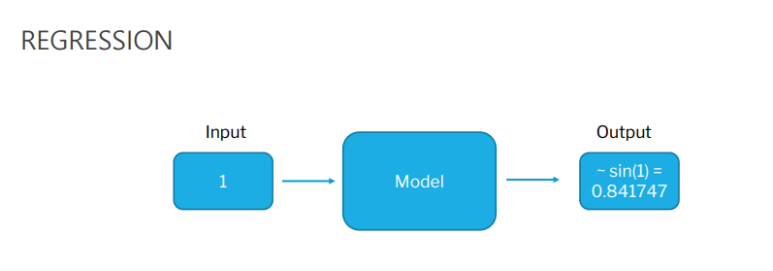
제가 할 sin모델의 원리는 선형 회귀를 쌓음으로써 임의의 함수를 예측하는 것입니다.

그래서 sin 파형의 데이터를 무수히 주면, 이것을 학습하여 패턴을 예측합니다. 

그 후부터는 인풋을 주면 모델을 거쳐 아웃풋을 예측합니다.

먼저 본격적인 설명드리기 앞서서 개괄적으로 플로우를 보여드린후에  설명드리겠습니다.

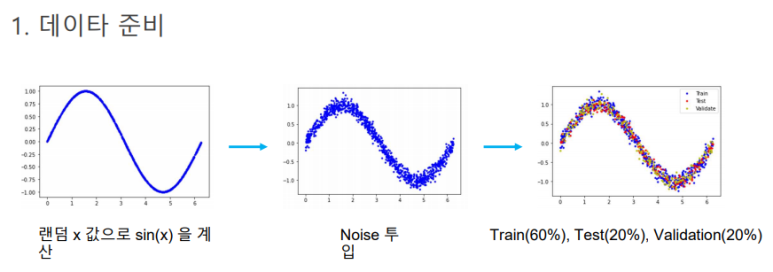
sin파 데이터와 학습 그래프입니다.

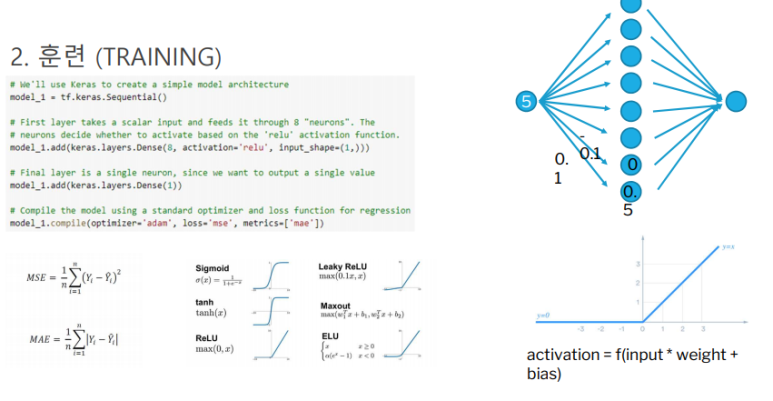
훈련을 시킨후에,

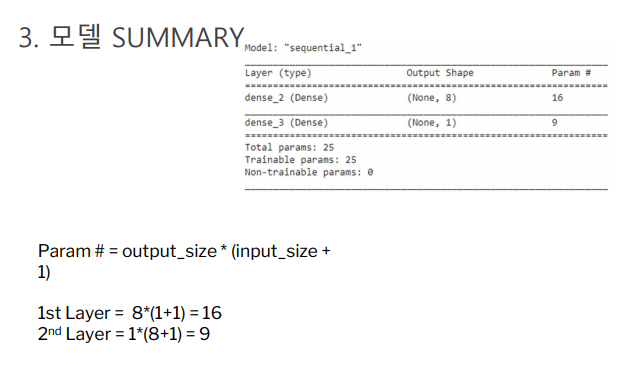
모델을 써머리합니다.

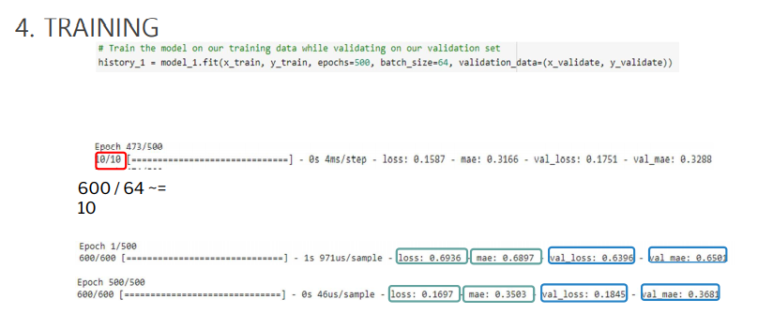
트레이닝을 시킵니다.

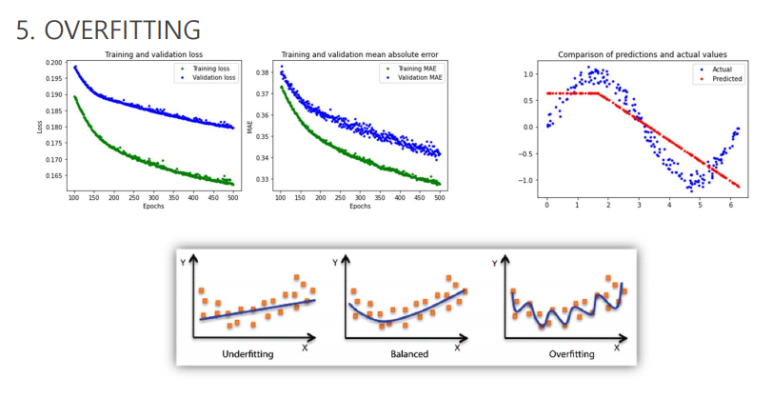
과적합이 발생함을 확인합니다.

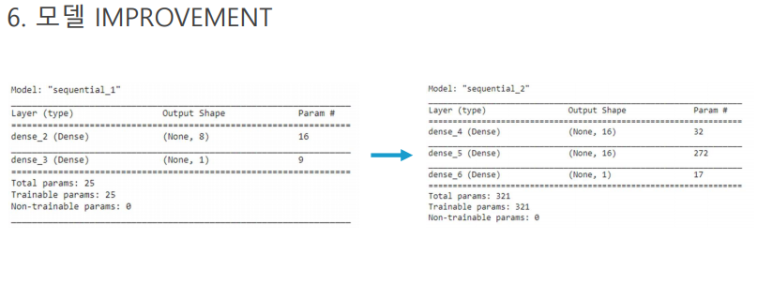
다시 모델을 개선합니다.

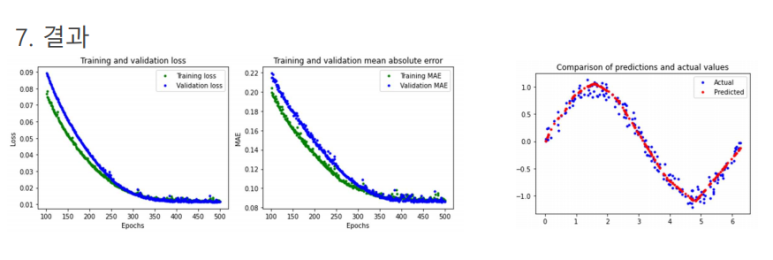
모델의 결과를 확인합니다.

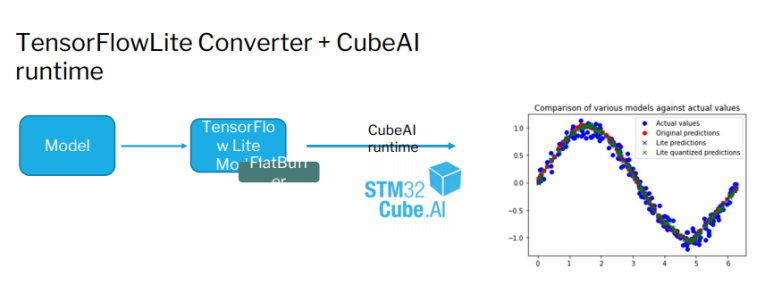
그 후 모델을 경량화 시켜 MCU에 포팅시킵니다.

In [1]:
# Define paths to model files
import os
MODELS_DIR = 'models/'
if not os.path.exists(MODELS_DIR):
    os.mkdir(MODELS_DIR)
MODEL_TF = MODELS_DIR + 'model'
MODEL_NO_QUANT_TFLITE = MODELS_DIR + 'model_no_quant.tflite'
MODEL_TFLITE = MODELS_DIR + 'model.tflite'
MODEL_TFLITE_MICRO = MODELS_DIR + 'model.cc'

첫번째로 먼저 모델을 이폴트 시킵니다.

In [2]:
! pip install tensorflow==2.4.0

  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


2.텐서플러우 설치해 줍니다.

In [3]:
# TensorFlow is an open source machine learning library
import tensorflow as tf

# Keras is TensorFlow's high-level API for deep learning
from tensorflow import keras
# Numpy is a math library
import numpy as np
# Pandas is a data manipulation library 
import pandas as pd
# Matplotlib is a graphing library
import matplotlib.pyplot as plt
# Math is Python's math library
import math

# Set seed for experiment reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

필요한 라이브러리들을 import 합니다.

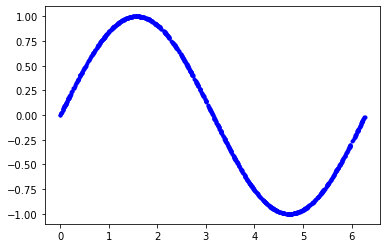

In [4]:
# Number of sample datapoints
SAMPLES = 1000

# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2π, which covers a complete sine wave oscillation
x_values = np.random.uniform(
    low=0, high=2*math.pi, size=SAMPLES).astype(np.float32)

# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)

# Calculate the corresponding sine values
y_values = np.sin(x_values).astype(np.float32)

# Plot our data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values, 'b.')
plt.show()

4.일련의 랜덤 X (1,2,3,4,5,...X) 값을 설정하고, 그에 해당하는 Sin 값을 그래프에 표시

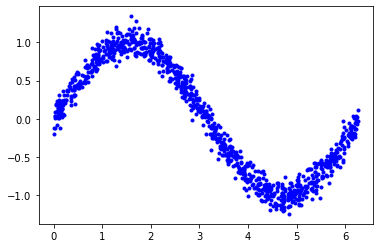

In [5]:
# Add a small random number to each y value
y_values += 0.1 * np.random.randn(*y_values.shape)

# Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

5. 노이즈 추가를 추가합니다.


이전 그래프에서는 사인함수를 사용했기에  부드러운  곡선이다.

하지만 머신러닝 모델의 경우 이러한 지저분한 실제 데이터로부터 기본 의미를 추출해야하므로, 

이를 입증하기 위해 데이터에 노이즈를 추가함으로써 더 실제적이고 자연적인 데이터를 인위적으로 만들어줍니다.  

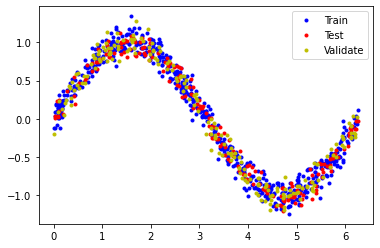

In [6]:
# We'll use 60% of our data for training and 20% for testing. The remaining 20%
# will be used for validation. Calculate the indices of each section.
TRAIN_SPLIT =  int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
x_train, x_test, x_validate = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) ==  SAMPLES

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.legend()
plt.show()

6. 이전의 실제 데이터와 유사한 데이터 셋을 이용하며 모델을 훈련시킵니다.

모델의 정확도를 평가하려면 예측과 실제 데이터를 비교하여 어느정도 일치하는지 확인해야 합니다

파란색 : Train 60%

빨간색 : Test 20%

노란색 : Validation 20% 

In [8]:
# Train the model on our training data while validating on our validation set
history_1 = model_1.fit(x_train, y_train, epochs=500, batch_size=64,
                        validation_data=(x_validate, y_validate))

NameError: name 'model_1' is not defined

# Train the model on our training data while validating on our validation set
history_1 = model_1.fit(x_train, y_train, epochs=500, batch_size=64,
                        validation_data=(x_validate, y_validate))
==============] - 0s 6ms/step - loss: 0.1685 - mae: 0.3485 - val_loss: 0.1846 - val_mae: 0.3684
Epoch 389/500
10/10 [==============================] - 0s 7ms/step - loss: 0.1622 - mae: 0.3443 - val_loss: 0.1847 - val_mae: 0.3692
Epoch 390/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1656 - mae: 0.3495 - val_loss: 0.1847 - val_mae: 0.3692
Epoch 391/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1680 - mae: 0.3484 - val_loss: 0.1848 - val_mae: 0.3700
Epoch 392/500
10/10 [==============================] - 0s 8ms/step - loss: 0.1779 - mae: 0.3601 - val_loss: 0.1846 - val_mae: 0.3688
Epoch 393/500
10/10 [==============================] - 0s 19ms/step - loss: 0.1667 - mae: 0.3450 - val_loss: 0.1847 - val_mae: 0.3695
Epoch 394/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1668 - mae: 0.3466 - val_loss: 0.1846 - val_mae: 0.3689
Epoch 395/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1751 - mae: 0.3564 - val_loss: 0.1845 - val_mae: 0.3683
Epoch 396/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1742 - mae: 0.3558 - val_loss: 0.1845 - val_mae: 0.3686
Epoch 397/500
10/10 [==============================] - 0s 7ms/step - loss: 0.1800 - mae: 0.3653 - val_loss: 0.1845 - val_mae: 0.3676
Epoch 398/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1663 - mae: 0.3425 - val_loss: 0.1845 - val_mae: 0.3678
Epoch 399/500
10/10 [==============================] - 0s 7ms/step - loss: 0.1731 - mae: 0.3566 - val_loss: 0.1845 - val_mae: 0.3683
Epoch 400/500
10/10 [==============================] - 0s 5ms/step - loss: 0.1656 - mae: 0.3431 - val_loss: 0.1846 - val_mae: 0.3691
Epoch 401/500
10/10 [==============================] - 0s 7ms/step - loss: 0.1603 - mae: 0.3438 - val_loss: 0.1846 - val_mae: 0.3688
Epoch 402/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1670 - mae: 0.3487 - val_loss: 0.1848 - val_mae: 0.3701
Epoch 403/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1762 - mae: 0.3544 - val_loss: 0.1846 - val_mae: 0.3692
Epoch 404/500
10/10 [==============================] - 0s 5ms/step - loss: 0.1714 - mae: 0.3497 - val_loss: 0.1845 - val_mae: 0.3685
Epoch 405/500
10/10 [==============================] - 0s 5ms/step - loss: 0.1652 - mae: 0.3454 - val_loss: 0.1846 - val_mae: 0.3689
Epoch 406/500
10/10 [==============================] - 0s 7ms/step - loss: 0.1663 - mae: 0.3471 - val_loss: 0.1851 - val_mae: 0.3710
Epoch 407/500
10/10 [==============================] - 0s 7ms/step - loss: 0.1604 - mae: 0.3435 - val_loss: 0.1845 - val_mae: 0.3679
Epoch 408/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1710 - mae: 0.3495 - val_loss: 0.1845 - val_mae: 0.3671
Epoch 409/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1716 - mae: 0.3498 - val_loss: 0.1846 - val_mae: 0.3689
Epoch 410/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1906 - mae: 0.3736 - val_loss: 0.1848 - val_mae: 0.3700
Epoch 411/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1804 - mae: 0.3610 - val_loss: 0.1848 - val_mae: 0.3703
Epoch 412/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1685 - mae: 0.3505 - val_loss: 0.1848 - val_mae: 0.3700
Epoch 413/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1598 - mae: 0.3406 - val_loss: 0.1846 - val_mae: 0.3686
Epoch 414/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1619 - mae: 0.3453 - val_loss: 0.1846 - val_mae: 0.3686
Epoch 415/500
10/10 [==============================] - 0s 7ms/step - loss: 0.1786 - mae: 0.3603 - val_loss: 0.1849 - val_mae: 0.3704
Epoch 416/500
10/10 [==============================] - 0s 7ms/step - loss: 0.1803 - mae: 0.3594 - val_loss: 0.1847 - val_mae: 0.3698
Epoch 417/500
10/10 [==============================] - 0s 8ms/step - loss: 0.1714 - mae: 0.3564 - val_loss: 0.1845 - val_mae: 0.3681
Epoch 418/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1673 - mae: 0.3479 - val_loss: 0.1845 - val_mae: 0.3674
Epoch 419/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1648 - mae: 0.3469 - val_loss: 0.1847 - val_mae: 0.3695
Epoch 420/500
10/10 [==============================] - 0s 5ms/step - loss: 0.1642 - mae: 0.3439 - val_loss: 0.1847 - val_mae: 0.3698
Epoch 421/500
10/10 [==============================] - 0s 7ms/step - loss: 0.1738 - mae: 0.3554 - val_loss: 0.1848 - val_mae: 0.3700
Epoch 422/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1662 - mae: 0.3466 - val_loss: 0.1845 - val_mae: 0.3681
Epoch 423/500
10/10 [==============================] - 0s 7ms/step - loss: 0.1678 - mae: 0.3476 - val_loss: 0.1845 - val_mae: 0.3686
Epoch 424/500
10/10 [==============================] - 0s 5ms/step - loss: 0.1762 - mae: 0.3599 - val_loss: 0.1845 - val_mae: 0.3684
Epoch 425/500
10/10 [==============================] - 0s 6ms/step - loss: 0.1688 - mae: 0.3467 - val_l


7. 입력값 X을 취하여 숫자 출력값인 x의 사인을 예측하는 신경망 모델을 구축한다. 이러한 유형의 문제를 회귀 분석이라고하며, 뉴런층을 사용하여 훈련 데이터의 기본 패턴을 학습하여 예측할 수 있다.

In [7]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
train_loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: name 'history_1' is not defined